In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import koreanize_matplotlib

[1] 데이터 읽어오기

In [2]:
k_data = './Data/대한민국_온실가스_분야별_배출량_추이_1990_2022.xlsx'

korea_data = pd.read_excel(k_data)


In [3]:
# 데이터 확인
korea_data.columns

Index(['구분(1)', '구분(2)', '구분(3)', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')

In [4]:
korea_data.columns[:3]

Index(['구분(1)', '구분(2)', '구분(3)'], dtype='object')

In [5]:
korea_data.tail()

,구분(1),구분(2),구분(3),1990,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
38,폐기물,소계,합계,13.439,14.822,16.379,17.434,19.563,20.956,20.775,...,19.790,19.237,19.691,19.595,20.112,19.354,18.769,18.483,18.339,18.189
39,NaN,A. 폐기물매립,소계,12.149,13.164,14.43,15.461,16.497,17.223,17.605,...,12.319,12.303,12.581,12.265,12.506,12.327,12.097,12.015,11.766,11.597
40,NaN,B. 고형폐기물의 생물학적 처리,소계,-,-,-,-,0.004,0.001,0.002,...,0.133,0.155,0.223,0.253,0.253,0.279,0.292,0.284,0.296,0.285
41,NaN,C. 폐기물소각 및 노천소각,소계,0.561,0.746,0.879,1.084,1.548,2.213,1.608,...,5.373,4.934,5.233,5.255,5.476,5.072,4.948,4.685,4.693,4.484
42,NaN,D. 하폐수처리,소계,0.73,0.911,1.07,0.89,1.514,1.520,1.561,...,1.965,1.844,1.653,1.821,1.878,1.676,1.432,1.501,1.583,1.823


In [6]:
# 구분1, 구분2, 구분3 이름바꾸기 => 산업 , 산업세부, 구분

korea_data.rename( columns={'구분(1)':'산업', '구분(2)':'산업세부', '구분(3)':'구분'},inplace=True)

korea_data.columns

Index(['산업', '산업세부', '구분', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [7]:
korea_data.head(5)

,산업,산업세부,구분,1990,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,총배출량,소계,합계,310.578,341.241,368.81,406.802,432.769,464.498,501.079,...,728.409,724.308,726.105,737.408,759.108,783.874,759.397,712.959,740.976,724.294
1,순배출량,소계,합계,271.615,306.226,334.623,374.169,397.753,431.236,464.395,...,682.146,677.165,678.332,689.192,716.259,742.310,720.742,674.120,701.975,686.462
2,에너지,소계,합계,234.476,257.329,273.752,303.459,323.158,347.962,381.519,...,569.702,560.877,562.925,575.020,587.475,612.120,586.435,544.600,566.782,551.889
3,NaN,A. 연료연소,소계,223.482,246.865,264.236,294.738,315.376,340.965,374.951,...,565.486,556.806,558.943,571.076,583.710,608.432,582.882,541.142,563.362,548.487
4,NaN,NaN,1. 에너지산업,42.027,49.946,59.045,66.967,81.318,91.952,115.575,...,276.151,263.947,262.303,263.821,275.086,299.964,279.423,248.224,260.020,257.502


In [8]:
# 산업, 산업세부 결측치 수정
korea_data['산업'] = korea_data['산업'].fillna(method='ffill')
korea_data['산업세부'] = korea_data['산업세부'].fillna('-')

C:\Users\KDT17\AppData\Local\Temp\ipykernel_12680\1127645247.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  korea_data['산업'] = korea_data['산업'].fillna(method='ffill')


In [9]:
korea_data

,산업,산업세부,구분,1990,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,총배출량,소계,합계,310.578,341.241,368.81,406.802,432.769,464.498,501.079,...,728.409,724.308,726.105,737.408,759.108,783.874,759.397,712.959,740.976,724.294
1,순배출량,소계,합계,271.615,306.226,334.623,374.169,397.753,431.236,464.395,...,682.146,677.165,678.332,689.192,716.259,742.310,720.742,674.120,701.975,686.462
2,에너지,소계,합계,234.476,257.329,273.752,303.459,323.158,347.962,381.519,...,569.702,560.877,562.925,575.020,587.475,612.120,586.435,544.600,566.782,551.889
3,에너지,A. 연료연소,소계,223.482,246.865,264.236,294.738,315.376,340.965,374.951,...,565.486,556.806,558.943,571.076,583.710,608.432,582.882,541.142,563.362,548.487
4,에너지,-,1. 에너지산업,42.027,49.946,59.045,66.967,81.318,91.952,115.575,...,276.151,263.947,262.303,263.821,275.086,299.964,279.423,248.224,260.020,257.502
5,에너지,-,2. 제조업 및 건설업,72.169,85.307,88.858,97.533,102.911,104.630,106.236,...,142.094,151.264,148.384,152.593,153.094,153.545,148.842,144.906,152.932,140.999
6,에너지,-,3. 수송,36.461,39.667,45.19,57.082,59.190,66.563,70.796,...,89.657,89.913,95.378,99.859,99.330,98.764,101.743,96.797,99.474,98.502
7,에너지,-,4. 기타,72.641,67.241,68.171,69.975,69.089,74.978,79.243,...,54.579,48.797,49.754,51.704,52.977,53.012,49.901,48.277,47.986,48.438
8,에너지,-,5. 미분류,0.183,4.704,2.972,3.181,2.868,2.841,3.101,...,3.005,2.885,3.124,3.099,3.223,3.148,2.972,2.938,2.950,3.046
9,에너지,B. 탈루,소계,10.994,10.464,9.516,8.721,7.782,6.998,6.568,...,4.216,4.071,3.982,3.944,3.766,3.688,3.554,3.458,3.420,3.402


In [10]:
korea_data.set_index(korea_data.columns[:3].tolist(), inplace=True)


In [11]:
korea_data.index

MultiIndex([(             '총배출량',                  '소계',           '합계'),
            (             '순배출량',                  '소계',           '합계'),
            (              '에너지',                  '소계',           '합계'),
            (              '에너지',             'A. 연료연소',           '소계'),
            (              '에너지',                   '-',     '1. 에너지산업'),
            (              '에너지',                   '-', '2. 제조업 및 건설업'),
            (              '에너지',                   '-',        '3. 수송'),
            (              '에너지',                   '-',        '4. 기타'),
            (              '에너지',                   '-',       '5. 미분류'),
            (              '에너지',               'B. 탈루',           '소계'),
            (              '에너지',                   '-',      '1. 고체연료'),
            (              '에너지',                   '-', '2. 석유 및 천연가스'),
            (      '산업공정 및 제품사용',                  '소계',           '합계'),
            (      '산업공정 및 제품사용',     

In [12]:
# 멀티인덱스 공백지우기

# korea_data.index = pd.MultiIndex.from_tuples(
#      [(level1.strip(), level2.strip(), level3.strip()) for level1, level2, level3 in korea_data.index]
# )

In [13]:
# # 각산업의 온실가스 배출량
korea_1_energy_total = korea_data.loc[('에너지','소계','합계')]
korea_2_Industrial_process_total =  korea_data.loc[('산업공정 및 제품사용','소계','합계')]
korea_3_agriculture_total =  korea_data.loc[('농업','소계','합계')]
#korea_4_land_use_total = korea_data.loc[('토지이용, 토지이용변화 및 임업','소계','합계')]
korea_5_waste_total = korea_data.loc[('폐기물','소계','합계')]

In [14]:
total_data = [korea_1_energy_total.sum(),
				korea_2_Industrial_process_total.sum(),
				korea_3_agriculture_total.sum(),
				korea_5_waste_total.sum(),]

name_list = ['에너지','산업공정','농업','폐기물']

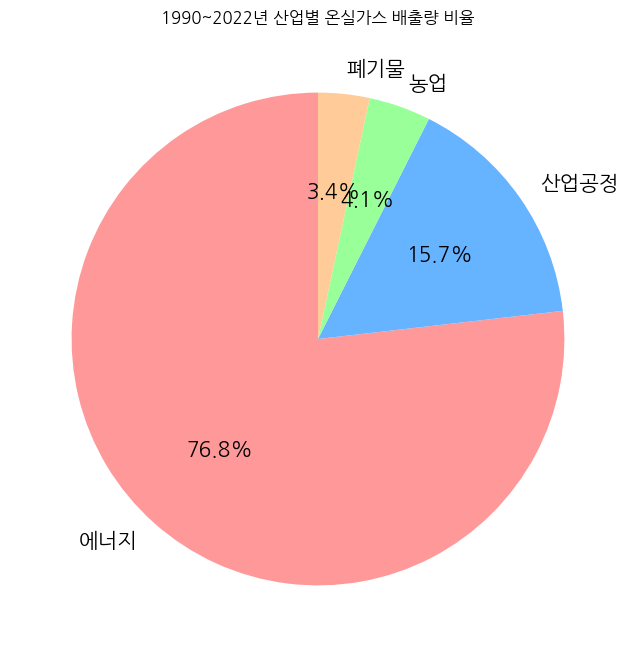

In [15]:
plt.figure(figsize=(8,8))
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(total_data, labels=name_list,autopct='%1.1f%%',startangle=90, textprops={"fontsize": 15},colors=custom_colors)
plt.title("1990~2022년 산업별 온실가스 배출량 비율")
plt.show()



In [16]:
korea_1_energy_total

1990    234.476
1991    257.329
1992    273.752
1993    303.459
1994    323.158
1995    347.962
1996    381.519
1997    398.736
1998    340.201
1999    372.901
2000    402.243
2001    415.072
2002    432.456
2003    442.261
2004    451.613
2005    448.169
2006    458.739
2007    477.327
2008    490.655
2009    499.156
2010    550.334
2011    580.221
2012    575.024
2013    569.702
2014    560.877
2015    562.925
2016     575.02
2017    587.475
2018     612.12
2019    586.435
2020      544.6
2021    566.782
2022    551.889
Name: (에너지, 소계, 합계), dtype: object

In [17]:
korea_5_waste_total

1990    13.439
1991    14.822
1992    16.379
1993    17.434
1994    19.563
1995    20.956
1996    20.775
1997    21.529
1998    20.697
1999    22.179
2000     23.39
2001    24.613
2002    24.131
2003    24.103
2004    22.507
2005    22.649
2006    22.614
2007     20.98
2008    20.295
2009    20.242
2010    19.739
2011    20.186
2012    19.864
2013     19.79
2014    19.237
2015    19.691
2016    19.595
2017    20.112
2018    19.354
2019    18.769
2020    18.483
2021    18.339
2022    18.189
Name: (폐기물, 소계, 합계), dtype: object

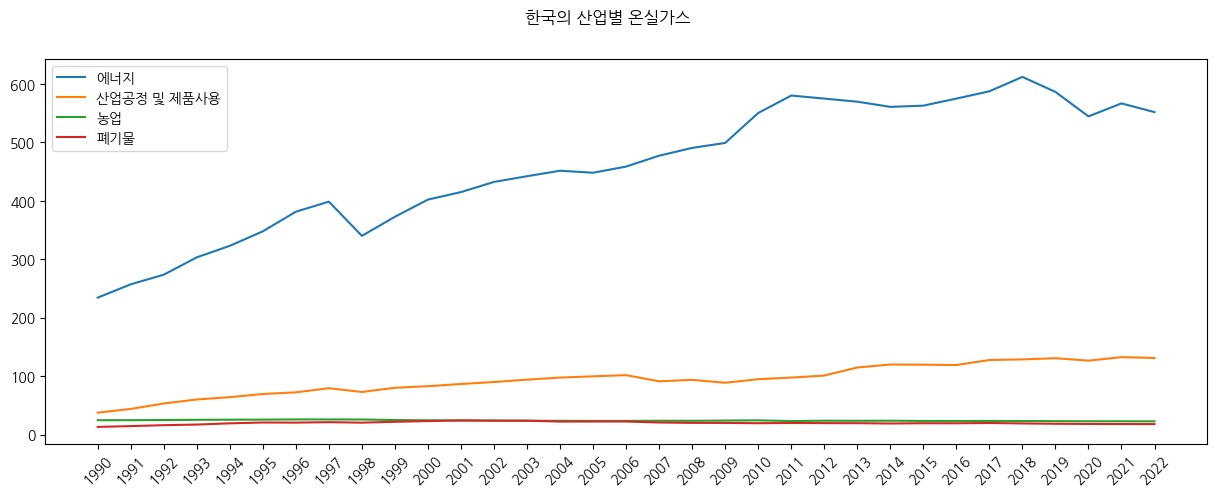

In [18]:
plt.figure(figsize=(15,5))
plt.suptitle('한국의 산업별 온실가스')
plt.plot(korea_1_energy_total.index,korea_1_energy_total.values, label='에너지' )
plt.plot(korea_2_Industrial_process_total.index,korea_2_Industrial_process_total.values ,label='산업공정 및 제품사용')
plt.plot(korea_3_agriculture_total.index,korea_3_agriculture_total.values ,label='농업')
plt.plot(korea_5_waste_total.index,korea_5_waste_total.values,label='폐기물' )
plt.xticks(rotation=45)
plt.legend()

In [19]:
# 농업부분 인덱스
korea_data.loc['농업']

,,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
산업세부,구분,,,,,,,,,,,,,,,,,,,,,
소계,합계,24.865,24.916,25.215,25.547,25.768,25.875,26.229,26.184,26.133,25.141,...,23.899,24.031,23.634,23.539,23.659,23.489,23.264,23.091,23.077,22.953
A. 장내발효,소계,3.753,3.988,4.314,4.795,5.078,5.307,5.724,5.772,5.571,4.816,...,5.875,6.093,5.826,5.786,5.888,5.972,6.122,6.326,6.558,6.742
B. 가축 분뇨처리,소계,3.311,3.514,3.761,4.031,4.200,4.371,4.566,4.662,4.825,4.641,...,5.536,5.572,5.605,5.635,5.897,5.983,6.041,6.009,6.008,6.055
C. 벼재배,소계,14.073,13.877,13.507,13.129,12.749,12.395,12.090,11.921,11.947,11.998,...,9.476,9.327,9.207,9.151,8.929,8.524,8.049,7.692,7.413,7.112
D. 농경지토양,소계,3.239,3.192,3.242,3.195,3.360,3.427,3.475,3.462,3.411,3.315,...,2.833,2.862,2.830,2.804,2.790,2.849,2.896,2.918,2.953,2.924
F. 작물잔사소각,소계,0.055,0.05,0.049,0.049,0.051,0.053,0.056,0.058,0.055,0.058,...,0.045,0.046,0.044,0.042,0.040,0.041,0.044,0.038,0.033,0.026
G. 석회 시용,소계,0.003,0.002,0.002,0.003,0.003,0.003,0.003,0.003,0.004,0.003,...,0.003,0.004,0.003,0.004,0.004,0.003,0.002,0.003,0.002,0.002
H. 요소 시용,소계,0.432,0.292,0.34,0.346,0.327,0.318,0.315,0.304,0.319,0.309,...,0.129,0.127,0.119,0.118,0.111,0.117,0.111,0.105,0.110,0.092


In [20]:
agriculture_1 =  korea_data.loc[('농업','A. 장내발효', '소계')]
agriculture_2 =  korea_data.loc[('농업','B. 가축 분뇨처리', '소계')]
agriculture_3 =  korea_data.loc[('농업','C. 벼재배', '소계')]
agriculture_4 =  korea_data.loc[('농업','D. 농경지토양', '소계')]

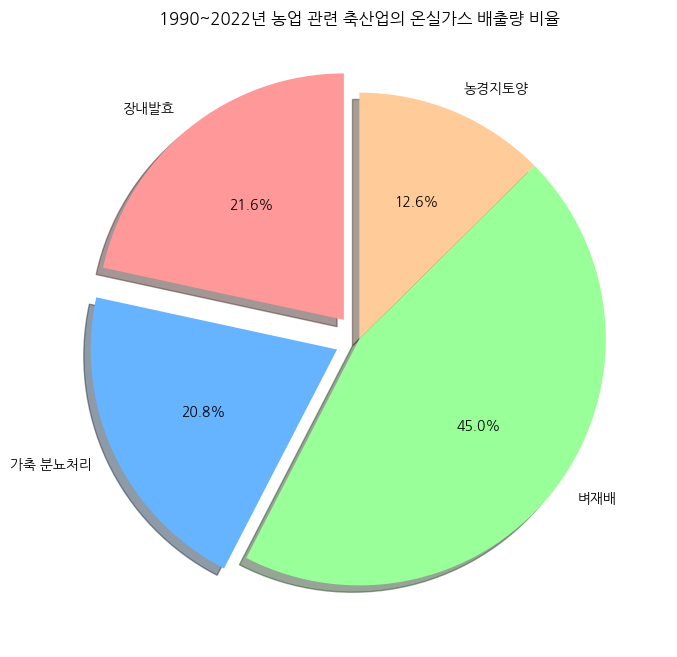

In [21]:
agricultur_total_data = [agriculture_1.sum(), agriculture_2.sum(), agriculture_3.sum() ,agriculture_4.sum()]

agricultur_name_list = ['장내발효','가축 분뇨처리','벼재배','농경지토양']
# 파이만 떼어내기
explode =[0.1,0.1,0,0]
plt.figure(figsize=(8,8))
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(agricultur_total_data, labels=agricultur_name_list,autopct='%1.1f%%',explode =explode ,startangle=90, colors=custom_colors, shadow=True)
plt.title("1990~2022년 농업 관련 축산업의 온실가스 배출량 비율")
plt.show()

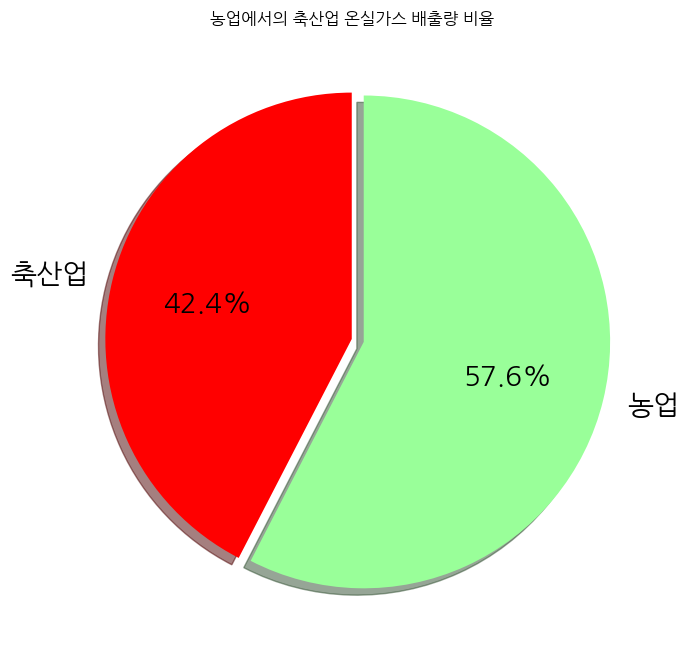

In [22]:


agricultur_total_data2 = [(agriculture_1.sum()+agriculture_2.sum()), (agriculture_3.sum() +agriculture_4.sum())]
agricultur_name_list = ['축산업','농업']

plt.figure(figsize=(8,8))
custom_colors = ['red', '#99ff99']
# 파이만 떼어내기
explode =[0.0,0.05]

plt.pie(agricultur_total_data2, labels=agricultur_name_list, autopct='%1.1f%%',startangle=90, explode =explode,colors=custom_colors,textprops={"fontsize": 20}, shadow=True )
plt.title("농업에서의 축산업 온실가스 배출량 비율")
plt.show()

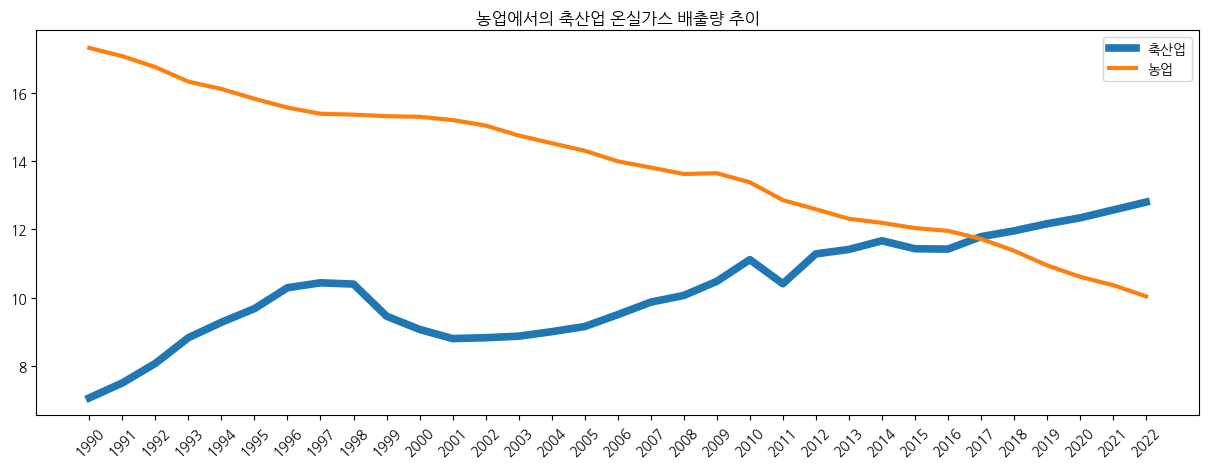

In [23]:
#agricultur_total_plot_2 = [(agriculture_1.sum()+agriculture_2.sum()), (agriculture_3.sum() +agriculture_4.sum())]
plt.figure(figsize=(15,5))

agricultur_name_list = ['축산업','농업']

n1_list = agriculture_1 + agriculture_2
n2_list = agriculture_3 + agriculture_4

plt.plot(agriculture_1.index, n1_list , label=agricultur_name_list[0], linewidth =5.5)
plt.plot(agriculture_1.index, n2_list , label=agricultur_name_list[1], linewidth =3)
plt.title("농업에서의 축산업 온실가스 배출량 추이")
plt.xticks(rotation=45)
plt.legend()
plt.show()


[에너지]

In [24]:
korea_energ_df  = korea_data.loc['에너지']

In [25]:
korea_energ_df 

1990     1991     1992     1993     1994     1995  \
산업세부    구분                                                                   
소계      합계            234.476  257.329  273.752  303.459  323.158  347.962   
A. 연료연소 소계            223.482  246.865  264.236  294.738  315.376  340.965   
-       1. 에너지산업       42.027   49.946   59.045   66.967   81.318   91.952   
        2. 제조업 및 건설업   72.169   85.307   88.858   97.533  102.911  104.630   
        3. 수송          36.461   39.667    45.19   57.082   59.190   66.563   
        4. 기타          72.641   67.241   68.171   69.975   69.089   74.978   
        5. 미분류          0.183    4.704    2.972    3.181    2.868    2.841   
B. 탈루   소계             10.994   10.464    9.516    8.721    7.782    6.998   
-       1. 고체연료        10.931   10.379    9.402    8.577    7.612    6.782   
        2. 석유 및 천연가스    0.063    0.085    0.114    0.144    0.170    0.216   

                         1996     1997     1998     1999  ...     2013  \
산업세부    구분                                                ...            
소계      합계            381.519  398.736  340.201  372.901  ...  569.702   
A. 연료연소 소계            374.951  392.510  334.224  367.093  ...  565.486   
-       1. 에너지산업      115.575  124.959  112.390  122.426  ...  276.151   
        2. 제조업 및 건설업  106.236  107.332   97.052  104.532  ...  142.094   
        3. 수송          70.796   76.405   59.222   64.372  ...   89.657   
        4. 기타          79.243   80.863   62.880   73.011  ...   54.579   
        5. 미분류          3.101    2.951    2.681    2.753  ...    3.005   
B. 탈루   소계              6.568    6.226    5.976    5.808  ...    4.216   
-       1. 고체연료         6.294    5.885    5.624    5.384  ...    3.270   
        2. 석유 및 천연가스    0.275    0.342    0.352    0.424  ...    0.946   

                         2014     2015     2016     2017     2018     2019  \
산업세부    구분                                                                   
소계      합계            560.877  562.925  575.020  587.475  612.120  586.435   
A. 연료연소 소계            556.806  558.943  571.076  583.710  608.432  582.882   
-       1. 에너지산업      263.947  262.303  263.821  275.086  299.964  279.423   
        2. 제조업 및 건설업  151.264  148.384  152.593  153.094  153.545  148.842   
        3. 수송          89.913   95.378   99.859   99.330   98.764  101.743   
        4. 기타          48.797   49.754   51.704   52.977   53.012   49.901   
        5. 미분류          2.885    3.124    3.099    3.223    3.148    2.972   
B. 탈루   소계              4.071    3.982    3.944    3.766    3.688    3.554   
-       1. 고체연료         3.196    3.154    3.092    2.844    2.704    2.621   
        2. 석유 및 천연가스    0.876    0.828    0.852    0.922    0.984    0.933   

                         2020     2021     2022  
산업세부    구분                                       
소계      합계            544.600  566.782  551.889  
A. 연료연소 소계            541.142  563.362  548.487  
-       1. 에너지산업      248.224  260.020  257.502  
        2. 제조업 및 건설업  144.906  152.932  140.999  
        3. 수송          96.797   99.474   98.502  
        4. 기타          48.277   47.986   48.438  
        5. 미분류          2.938    2.950    3.046  
B. 탈루   소계              3.458    3.420    3.402  
-       1. 고체연료         2.563    2.484    2.426  
        2. 석유 및 천연가스    0.895    0.937    0.976  

[10 rows x 33 columns]

In [26]:
korea_energ_df.index

MultiIndex([(     '소계',           '합계'),
            ('A. 연료연소',           '소계'),
            (      '-',     '1. 에너지산업'),
            (      '-', '2. 제조업 및 건설업'),
            (      '-',        '3. 수송'),
            (      '-',        '4. 기타'),
            (      '-',       '5. 미분류'),
            (  'B. 탈루',           '소계'),
            (      '-',      '1. 고체연료'),
            (      '-', '2. 석유 및 천연가스')],
           names=['산업세부', '구분'])

In [27]:
korea_energ_dfX = korea_energ_df.loc[korea_energ_df.index[2:]]

In [28]:
korea_energ_dfX.index

MultiIndex([(    '-',     '1. 에너지산업'),
            (    '-', '2. 제조업 및 건설업'),
            (    '-',        '3. 수송'),
            (    '-',        '4. 기타'),
            (    '-',       '5. 미분류'),
            ('B. 탈루',           '소계'),
            (    '-',      '1. 고체연료'),
            (    '-', '2. 석유 및 천연가스')],
           names=['산업세부', '구분'])

In [29]:
korea_energ_dfX.reset_index(level='산업세부', drop=True, inplace=True)

In [30]:
korea_energ_dfX.index

Index(['1. 에너지산업', '2. 제조업 및 건설업', '3. 수송', '4. 기타', '5. 미분류', '소계', '1. 고체연료',
       '2. 석유 및 천연가스'],
      dtype='object', name='구분')

In [31]:
korea_energ_dfX.drop(index='소계',inplace=True)

# 인덱스의 숫자 제거 및 산업 이름으로 변경
korea_energ_dfX.index = korea_energ_dfX.index.str.replace(r'^\d+\.\s*', '', regex=True)

In [32]:
korea_energ_dfX

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
구분,,,,,,,,,,,,,,,,,,,,,
에너지산업,42.027,49.946,59.045,66.967,81.318,91.952,115.575,124.959,112.390,122.426,...,276.151,263.947,262.303,263.821,275.086,299.964,279.423,248.224,260.020,257.502
제조업 및 건설업,72.169,85.307,88.858,97.533,102.911,104.630,106.236,107.332,97.052,104.532,...,142.094,151.264,148.384,152.593,153.094,153.545,148.842,144.906,152.932,140.999
수송,36.461,39.667,45.19,57.082,59.190,66.563,70.796,76.405,59.222,64.372,...,89.657,89.913,95.378,99.859,99.330,98.764,101.743,96.797,99.474,98.502
기타,72.641,67.241,68.171,69.975,69.089,74.978,79.243,80.863,62.880,73.011,...,54.579,48.797,49.754,51.704,52.977,53.012,49.901,48.277,47.986,48.438
미분류,0.183,4.704,2.972,3.181,2.868,2.841,3.101,2.951,2.681,2.753,...,3.005,2.885,3.124,3.099,3.223,3.148,2.972,2.938,2.950,3.046
고체연료,10.931,10.379,9.402,8.577,7.612,6.782,6.294,5.885,5.624,5.384,...,3.270,3.196,3.154,3.092,2.844,2.704,2.621,2.563,2.484,2.426
석유 및 천연가스,0.063,0.085,0.114,0.144,0.170,0.216,0.275,0.342,0.352,0.424,...,0.946,0.876,0.828,0.852,0.922,0.984,0.933,0.895,0.937,0.976


In [33]:

energy_dict = dict()

for i in korea_energ_dfX.index:
	key = i
	value = int(korea_energ_dfX.loc[i].sum())
	energy_dict[key] = value

print(energy_dict)

{'에너지산업': 6120, '제조업 및 건설업': 4125, '수송': 2623, '기타': 2027, '미분류': 96, '고체연료': 159, '석유 및 천연가스': 20}


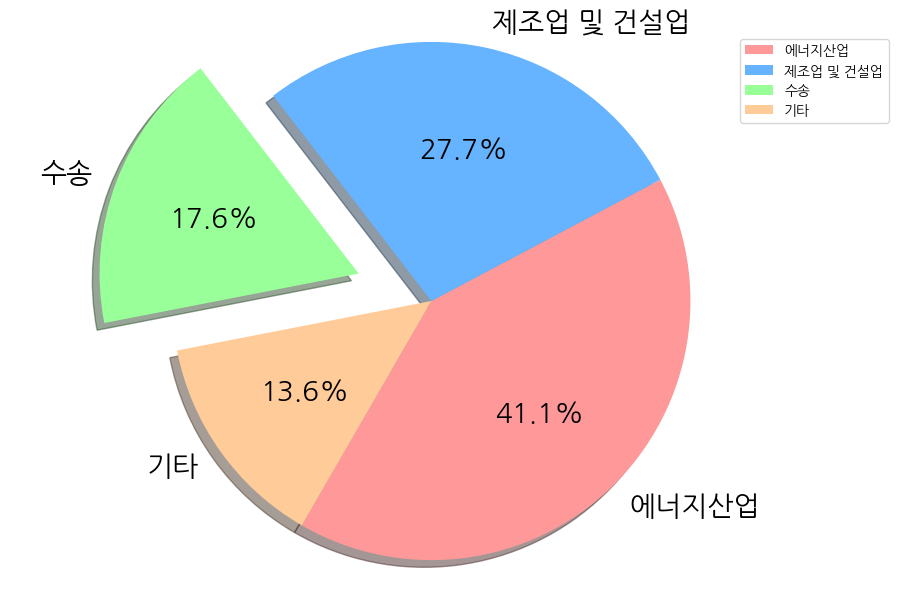

In [34]:
# 키와 값 분리
labels = list(energy_dict.keys())[:4]  # 키값
values = list(energy_dict.values())[:4]  # 벨류값
# 수송 파이만 떼어내기
explode =[0,0,0.3,0]

custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
# 파이 그래프 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.pie(values,autopct='%1.1f%%', startangle=240,labels=labels,explode=explode, textprops={"fontsize": 20}, shadow=True , colors=custom_colors )
plt.legend(labels, loc='lower right',bbox_to_anchor=(1.15, 0.8))
plt.tight_layout()
plt.axis('equal')  # 원형 그래프를 유지하기 위해 비율 설정
#plt.title('에너지 산업의 업종별 온실가스')
plt.show()  # 그래프 출력

In [35]:
korea_energ_dfX

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
구분,,,,,,,,,,,,,,,,,,,,,
에너지산업,42.027,49.946,59.045,66.967,81.318,91.952,115.575,124.959,112.390,122.426,...,276.151,263.947,262.303,263.821,275.086,299.964,279.423,248.224,260.020,257.502
제조업 및 건설업,72.169,85.307,88.858,97.533,102.911,104.630,106.236,107.332,97.052,104.532,...,142.094,151.264,148.384,152.593,153.094,153.545,148.842,144.906,152.932,140.999
수송,36.461,39.667,45.19,57.082,59.190,66.563,70.796,76.405,59.222,64.372,...,89.657,89.913,95.378,99.859,99.330,98.764,101.743,96.797,99.474,98.502
기타,72.641,67.241,68.171,69.975,69.089,74.978,79.243,80.863,62.880,73.011,...,54.579,48.797,49.754,51.704,52.977,53.012,49.901,48.277,47.986,48.438
미분류,0.183,4.704,2.972,3.181,2.868,2.841,3.101,2.951,2.681,2.753,...,3.005,2.885,3.124,3.099,3.223,3.148,2.972,2.938,2.950,3.046
고체연료,10.931,10.379,9.402,8.577,7.612,6.782,6.294,5.885,5.624,5.384,...,3.270,3.196,3.154,3.092,2.844,2.704,2.621,2.563,2.484,2.426
석유 및 천연가스,0.063,0.085,0.114,0.144,0.170,0.216,0.275,0.342,0.352,0.424,...,0.946,0.876,0.828,0.852,0.922,0.984,0.933,0.895,0.937,0.976


In [36]:
korea_energ_dfX.iloc[1]

1990     72.169
1991     85.307
1992     88.858
1993     97.533
1994    102.911
1995     104.63
1996    106.236
1997    107.332
1998     97.052
1999    104.532
2000    115.401
2001    115.574
2002    119.478
2003    124.429
2004    125.217
2005    116.105
2006    118.787
2007    124.474
2008    129.048
2009    119.891
2010    142.754
2011    164.099
2012    154.588
2013    142.094
2014    151.264
2015    148.384
2016    152.593
2017    153.094
2018    153.545
2019    148.842
2020    144.906
2021    152.932
2022    140.999
Name: 제조업 및 건설업, dtype: object

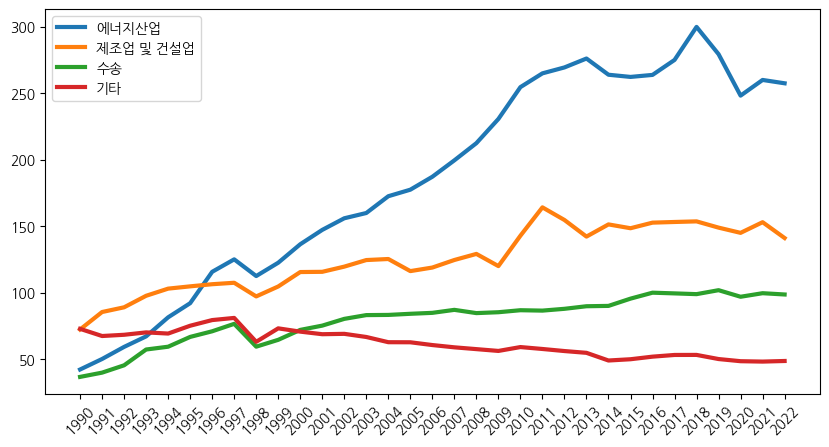

In [37]:
plt.figure(figsize=(10, 5))
for i in korea_energ_dfX.index[:4]:
	
	plt.plot(korea_energ_dfX.columns, korea_energ_dfX.loc[i], label=i , linewidth=3)

plt.xticks(rotation=45)
plt.legend()
plt.show()

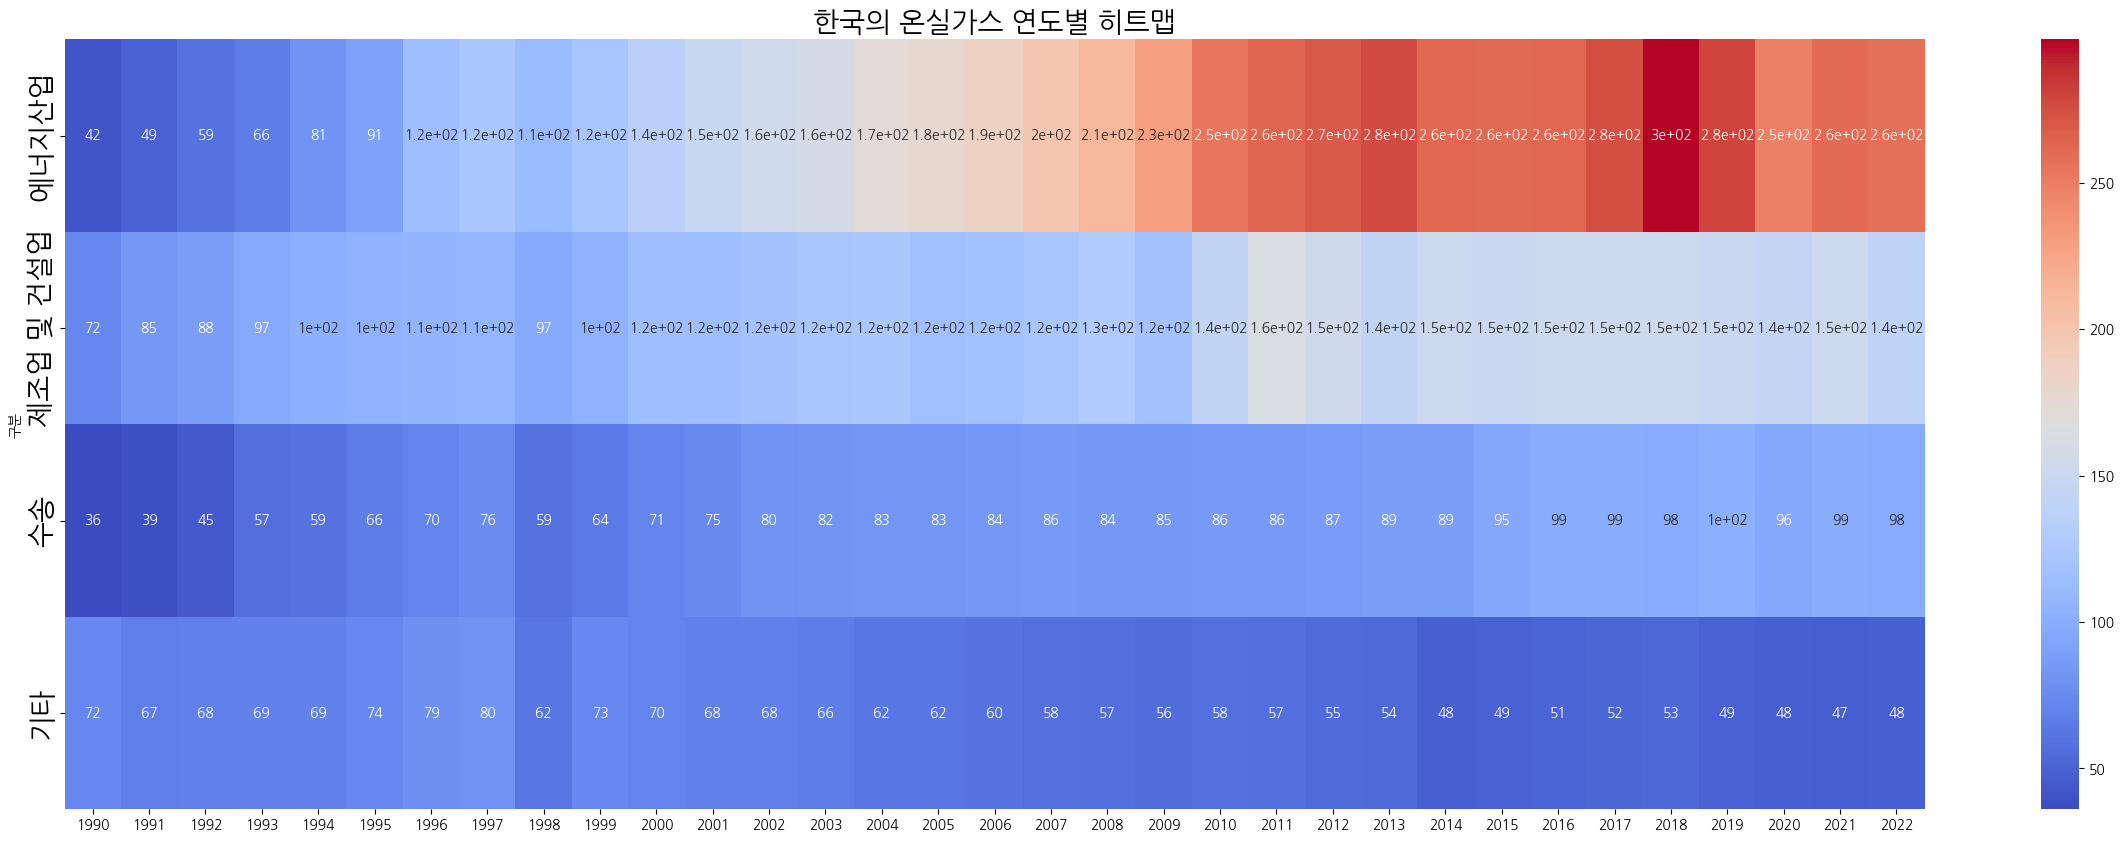

In [38]:
# 히트맵
korea_energ_dfX = korea_energ_dfX.astype('int')

# 히트맵 그리기
plt.figure(figsize=(30, 10))
sns.heatmap(korea_energ_dfX.iloc[:4], annot=True, cmap='coolwarm', cbar=True)
plt.title('한국의 온실가스 연도별 히트맵',fontsize=20)

plt.yticks(fontsize=20)
plt.show()